In [91]:
import matplotlib.pyplot as plt
#mat编结 垫子 plot 阴谋情节，一块地，测算表，lib库
#plt.plot()#生成一个空plot 画布 对象
#plt.show()# 展示出来

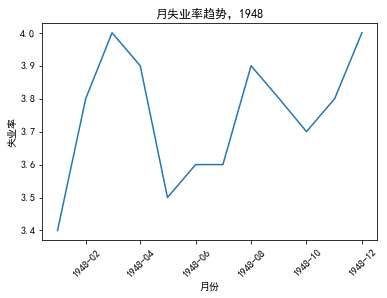

In [92]:
#=画线 .plot(x,y) .show()===
#注意直接用.plt.plot()，后面都是 前面的画布对象.plot() .subplots .bar() .scatter() 之类的,
import pandas as pd
from pylab import mpl#【引入支持中文标签的包】
mpl.rcParams['font.sans-serif'] = ['SimHei']#【支持中文处理】
unra = pd.read_csv("unrate.csv")#文件是大写的，小写也能读
unra['DATE'] = pd.to_datetime(unra['DATE'])#改日期格式
#print(unra.head(3))
#print(unra[0:3])#看到没，上下两种方法都能取前三条,一样的
dataSeries = unra[0:12]
plt.plot(dataSeries['DATE'],dataSeries['VALUE'])
#日期横轴，值纵轴
plt.xticks(rotation=45)
#x轴倾斜45度,tick 嘀嗒声 打勾
plt.xlabel('月份')
plt.ylabel('失业率')
plt.title("月失业率趋势，1948")
#加横纵轴和总标题
plt.show()

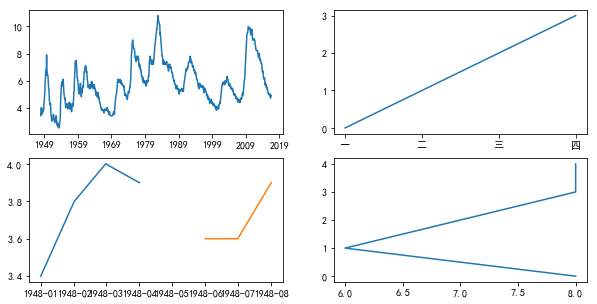

In [40]:
import numpy as np
#===画子图（用于多图组合，比对） .figure() .add_subplot(行，列，位号) .plot() .show()===
#fig1 = plt.plot()#注意，这样不行，plot是直接就建好了一个画布，
fig1 = plt.figure(figsize=(10,5))#要用figure,figure是一个画图域，里面可以加很多子画布
#figsize画图域大长宽
ax1 = fig1.add_subplot(2,2,1)#2行2列，第1位
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,4)#2行2列，第4位
ax1.plot(unra['DATE'],unra['VALUE'])#加数据，同上，横纵轴
ax2.plot(['一','二','三','四'],np.arange(4))
ax3.plot(np.random.randint(1,10,5),np.arange(5))
#np.random.randint(起，终，个数)生成随机整数, .arange，生成有规律整数
#画两条线,直接一个对象赋两个plot值即可
ax4 = fig1.add_subplot(2,2,3)
ax4.plot(unra[0:4]['DATE'],unra[0:4]['VALUE'])
ax4.plot(unra[5:8]['DATE'],unra[5:8]['VALUE'])
plt.show()

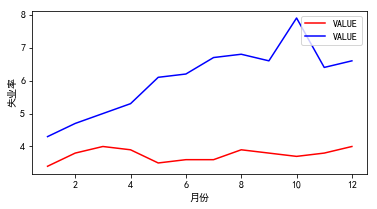

In [49]:
#读文件 赋值给unra，取日期 转日期格式，头部引plt等省略，见上面
unra['MONTH'] = unra['DATE'].dt.month# .dt.month 取日期格式里的月份
fig2 = plt.figure(figsize =(6,3))#一个图也可以用画图区域，可以方例改大小,plt.plot是直接画了。
#先加一个figure画图区域，便于管理里面的plot画布
plt.plot(unra[0:12]['MONTH'],unra[0:12]['VALUE'],c='red')#红线
plt.plot(unra[12:24]['MONTH'],unra[12:24]['VALUE'],c='blue')#蓝线
plt.xlabel("月份")
plt.ylabel("失业率")
plt.legend(loc='upper right')#加图例 best 是自动确定位置
plt.show()

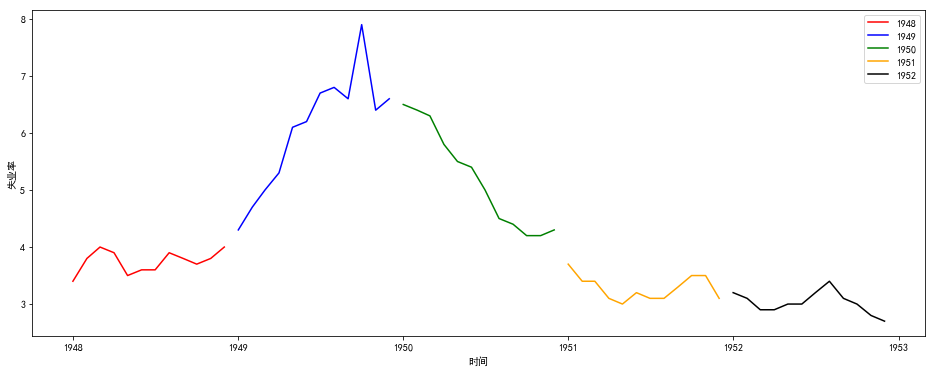

In [93]:
#===改进上面，用for 确定 多个起始段 画多条线====

fig = plt.figure(figsize=(16,6))
colors = ['red','blue','green','orange','black']
for i in range(5):
    startI = i*12#12倍间隔,一年12个月，以年分割，结合此篇数据
    endI = (i+1)*12
    newDataSer = unra[startI:endI]
    label = str(1948+i)#1948根据表中数据自己总结的
    plt.plot(newDataSer['DATE'],newDataSer['VALUE'],c = colors[i],label=label)#label加图例文字
plt.legend(loc='best')
plt.ylabel("失业率")
plt.xlabel("时间")
plt.show()
    


   RT_norm_round  RT_user_norm_round  Metacritic_norm_round  IMDB_norm_round
0            3.5                 4.5                    3.5              4.0
1            4.5                 4.0                    3.5              3.5
2            4.0                 4.5                    3.0              4.0
3            1.0                 4.0                    1.0              2.5
4            0.5                 1.5                    1.5              2.5


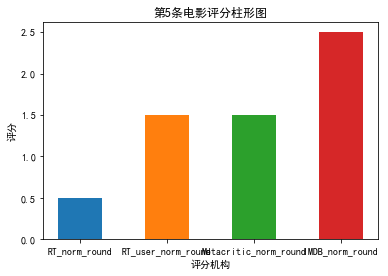

In [177]:
#==画柱图 .subplots() .bar() .barh() .show()==
import pandas as pd
from numpy import arange

fand = pd.read_csv('fandango_scores.csv')
#fSer = fand[['FILM','RT_norm_round','RT_user_norm_round','Metacritic_norm_round','IMDB_norm_round']]#选几列
cols = ['RT_norm_round','RT_user_norm_round','Metacritic_norm_round','IMDB_norm_round']
fSer = fand[cols]
#取多行用双层[]
print(fSer[:5])

n = 5;

if n > 0:
    n = n
else:
    n =1

newFSer= fSer[n-1:n]
'''
barX = arange(4)+0.75
barY = newFSer.loc[2,cols].values
#ix——通过行标签或者行号索引行数据
#作用同.loc ,.loc[第几条，显示的纵轴]
fig,ax = plt.subplots()
ax.bar(barX,barY, 0.5)#X,Y,柱宽
'''
fig,ax = plt.subplots()#画柱图用的subplots,ax.bar，fig控制长相加子图之类的，ax控制x轴y轴

for i in cols:
    barX = i
    #barY = newFSer.loc[0,cols].values
    barY = newFSer[i].values
    #ix——通过行标签或者行号索引行数据
    #作用同.loc ,.loc[第几条，显示的纵轴]
    #fig,ax = plt.subplots()#画柱图用的subplots,ax.bar，fig控制长相，ax控制x轴y轴
    #【画在一张表上，所以移到循环外面了】
    ax.bar(barX,barY, 0.5)#X,Y,柱宽
    #ax.barh(barX,barY, 0.5)# .barh 横着画

plt.xlabel("评分机构")
plt.ylabel("评分")
plt.title("第"+str(n)+"条电影评分柱形图")
plt.show()


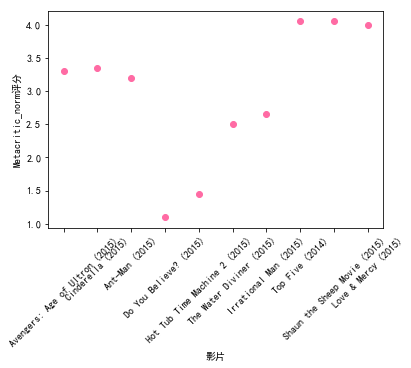

In [257]:
#===画散点图 plt.subplots() 前面对象.scatter(X，Y) plt.show()===
#import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
dFand2 = pd.read_csv("fandango_scores.csv");
fig,ax = plt.subplots()
#因为散点和柱要画很多小图不连惯，所以用了subplots
ax.scatter(dFand2[:10]['FILM'],dFand2[:10]['Metacritic_norm'],c=(255/255,107/255,164/255))
#x,y拿出某列即可，它相关的样本值即散布在图上
#rgb颜色每项必须加一个/255
plt.xticks(rotation=45)
plt.xlabel('影片')
#plt.ylabel('Metacritic_norm评分')
ax.set_ylabel('Metacritic_norm评分')
#【设置x,y标题用plt.ylabel 或 前面对象.set_ylabel，都可以】
plt.show()


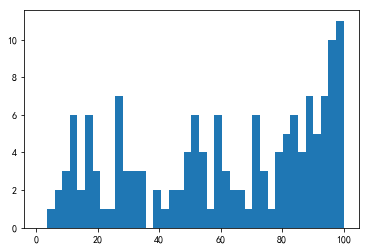

(None,)

In [255]:
#==画数值区间图 plt.subplots(), 对象.hist(x,range(1,5)y軕起止,bins=20 把前面确定的数据分成几个区域), plt.show()==
import pandas as pd
import matplotlib.pyplot as plt
dFand3 = pd.read_csv("fandango_scores.csv")
fig,ax = plt.subplots()
#ax.hist(dFand3['RottenTomatoes'])
#上面这样就可以直接画 x轴显示1-100,20个一格,y 1-30,5个一格
#fig2 = fig.add_subplot(2,2,2);#试了下fig作用，可以在右上角加子表，所以说它决定了长相。
ax.hist(dFand3['RottenTomatoes'],range=(1,100),bins=40)
#【range控制起止点，bins相当于放大缩小镜（通过把1-100个数分成几个区间来实现，比如2就是分成两块，10就是分成10块），控制数据值的区间对比变大变小】
#hist 中译 唤人注意 区间
#ax.set_ylim(0,5)#设置y轴起止点
plt.show(),


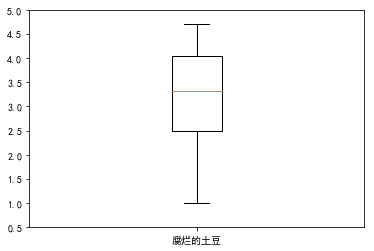

In [225]:
#===画盒图 plt.subplots(), 对象.boxplot()，plt.show()===
import pandas as pd
import matplotlib.pyplot as plt
dFand4 = pd.read_csv('fandango_scores.csv');
fig,ax = plt.subplots()
ax.boxplot(dFand4['RT_user_norm'])
ax.set_xticklabels(['腐烂的土豆'])#x轴标题,以下两种加标题方法都行
#ax.set_xlabel('腐烂的土豆')
#plt.xlabel('腐烂的土豆')#x轴标题
ax.set_ylim(0.5,5)#y轴起止点
plt.show()

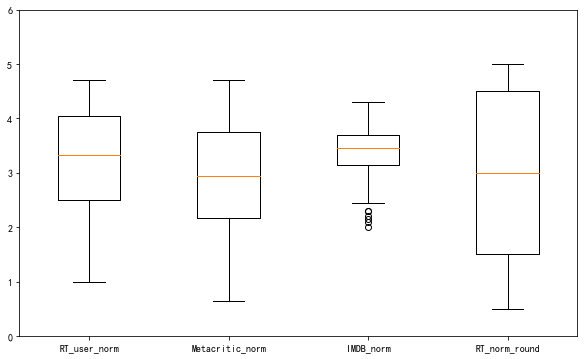

In [253]:
#===画盒图 加多个盒 列放到一个list中===
import pandas as pd
import matplotlib.pyplot as plt
dFand5 = pd.read_csv('fandango_scores.csv');
cols = ["RT_user_norm","Metacritic_norm","IMDB_norm","RT_norm_round"]
fig,ax = plt.subplots(figsize=(10,6))#【这里也可以加figsize】
ax.boxplot(dFand5[cols].values)
ax.set_xticklabels(cols)#x轴标题
#ax.set_xlabel(cols)#下面两个就不行了，取出来是一个list数组，而上面是取出里面的值
#plt.xlabel(cols)#x轴标题
ax.set_ylim(0,6)#y轴起止点
#ax.tick_params(bottom = "on", top ="off", left = "off", right ="off")
#去掉和加轴上的小刻度
plt.show()